<a href="https://colab.research.google.com/github/SusaiIgnesh/Readme/blob/main/EDA_Visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Python for Data Science & Analysis**

**Notes 3.1, Exploratory Data Analysis & Visualization**

**Objectives**

(*)write a program which uses seaborn to:

(*)show univariate plots (eg., distplot)

(*)show multivariate plots (eg., scatterplot)

(*)EXTRA: customize plots

**Part 3: Visualization**

**How do I use pandas to plot?**

Pandas has a .plot which you configure using its arguments (eg., kind=hist), this however just uses seaborn.

In [2]:
from google.colab import files
upload=files.upload()

Saving titanic.csv to titanic.csv


In [4]:
import pandas as pd
ti=pd.read_csv("titanic.csv")
ti.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


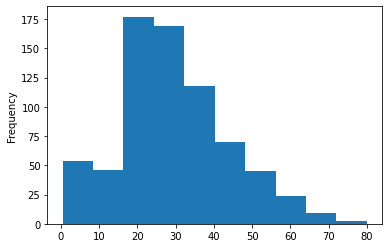

In [5]:
ti['age'].plot(kind='hist');

Often pandas doesn't choose the right plot, or the right dataseries... therefore it's often easier to go straight to using seaborn.

**How do I use seaborn to visualize data?**

In [6]:
import seaborn as sns

**Checks for emptiness and cleanse data**


In [7]:
ti.isna().sum() #check for emptiness

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
#replace NaNs in numerical fields with the mean values
ti=ti.fillna(ti.mean()) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [9]:
# fill every column with its own most frequent value 
ti = ti.apply(lambda x:x.fillna(x.value_counts().index[0])) 

In [10]:
ti

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


**There are two ways of using seaborn, you can either**


(*)supply x (, y, etc.) as individual arguments

OR: supply a dataframe and name the relevant columns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


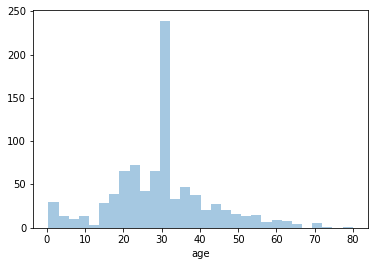

In [11]:
sns.distplot(ti['age'], kde=False);

**What is the kde?**


(*)approximation of the distribution using a linear combination of normal distributions

(*)further reading: https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


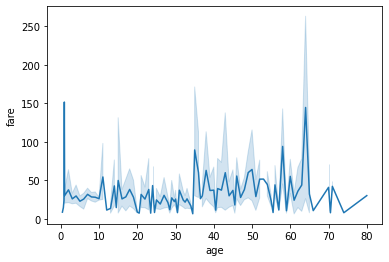

In [12]:
sns.lineplot(ti['age'], ti['fare'])

**How do I use a dataframe with seaborn?**


We set data to be the dataframe, and name the columns for x and y...

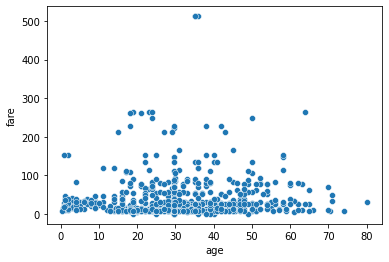

In [13]:
sns.scatterplot(data=ti, x='age', y='fare')

**How do I create a distribution plot?**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


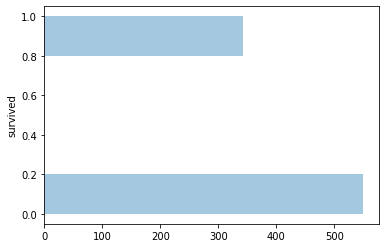

In [16]:
sns.distplot(ti['survived'], vertical=True, kde=False)

**How do I create a violin plot?**

The width of a violin plot is the frequency (ie., how common) a value is within some column...

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


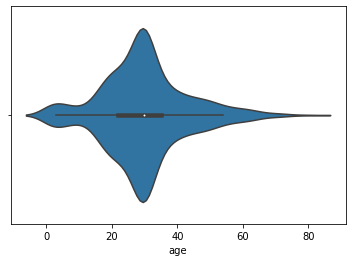

In [17]:
sns.violinplot(ti['age'])

**How do I create a box plot?**

Box plots show quarties (25th, 50th, 75th) and outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


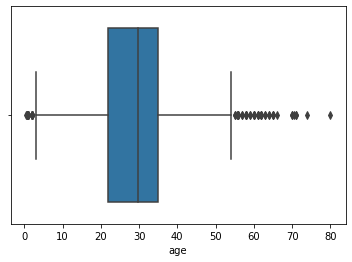

In [18]:
sns.boxplot(ti['age'])

**How do I create a violin plot for multiple columns?**

A violin plot can show multiple distributions, each a subset of a single column, factored (or grouped) by another.

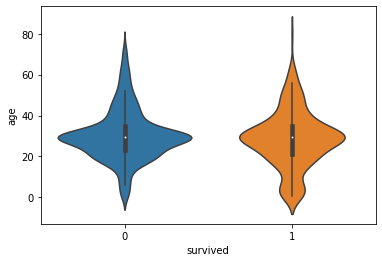

In [19]:

sns.violinplot(data=ti, x='survived', y='age')

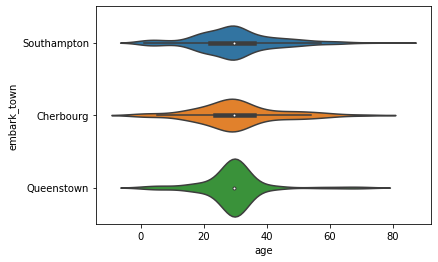

In [20]:
sns.violinplot(data=ti, x="age", y='embark_town')

**How do I create a bar plor for multiple columns?**

Bar plots are useful for discrete data or for showing, here, the means:

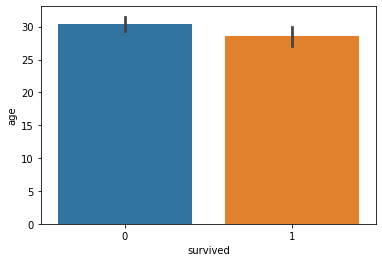

In [21]:
sns.barplot(data=ti, x='survived', y='age');

**How do I create a line plot?**

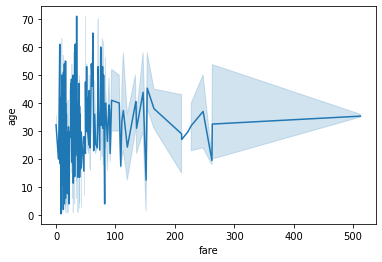

In [22]:
sns.lineplot(data=ti, x='fare', y='age');

NB: would creating a scatter plot be more appropriate?


**How do I create a scatter plot?**

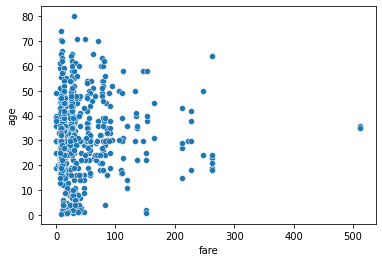

In [23]:
sns.scatterplot(data=ti, x='fare', y='age');

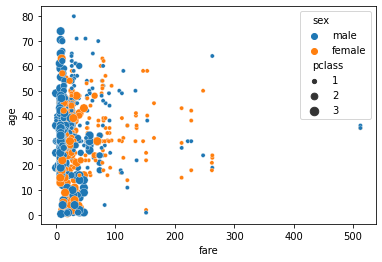

In [24]:
sns.scatterplot(data=ti, x='fare', y='age', 
                hue = 'sex', 
                size = 'pclass');

**EXTRA: Tips**

(*)Often for the sake of communication, using excel is both faster and leads to better visuals

(*)use df.to_csv() to save the data behind a visual

(*)use excel to heavily customize the layout (and then, eg., copy powerpoint)

**Exercise (30 min)**


**Step 1 (5 min)**

review seaborn individual, try a few plots

**Step 2 (25 min)**


(*)What affected your chances of survival on the titanic?

    brainstorm & execute an analysis of the titanic dataset
**Consider:**
  old vs. young

  women vs. men

  women & children vs. men

  cheaper vs. expensive tickets

  deck

  class

  ...location...

  Use seaborn plots (and pandas) to obtain helpful visuals which answer the investigatory question.

**Consider:**

Univariate (single-col) plots

 sns.distplot

  (*)of survived

 sns.violinplot

  (*)of fare

 sns.boxplot

  (*)of age

**Multivariate (here: 2-col) plots**

 sns.violinplot

  (*)age by survived

  (*)fare by survived

 sns.lineplot

  (*)fare vs. age

 sns.scatterplot

  (*)age vs. fare

ti[["age","sex"]].groupby(ti.age>18).sum()

In [25]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


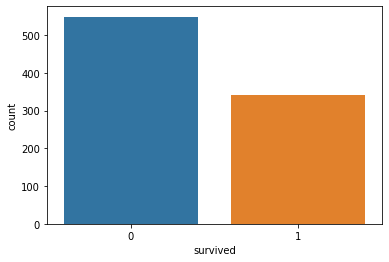

In [30]:
sns.countplot(ti['survived'])

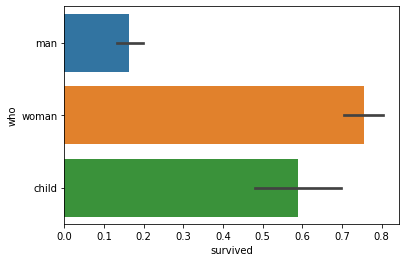

In [27]:

sns.barplot(data=ti, x='survived', y='who');


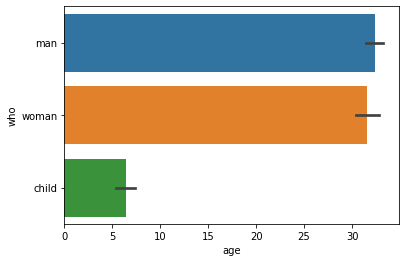

In [31]:
sns.barplot(data=ti, x='age', y='who');

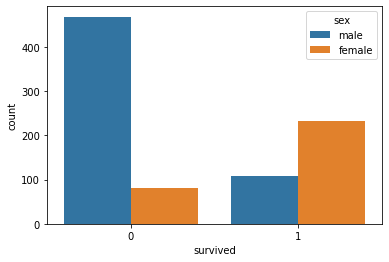

In [32]:
sns.countplot(data=ti,x='survived',hue='sex')

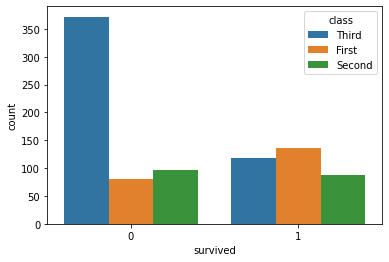

In [33]:
sns.countplot(data=ti,x='survived',hue='class')

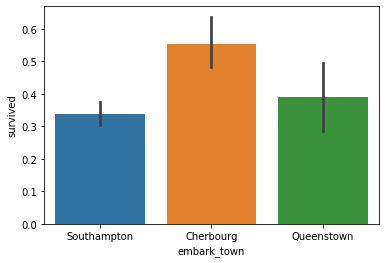

In [28]:
sns.barplot(data=ti,x='embark_town',y='survived')

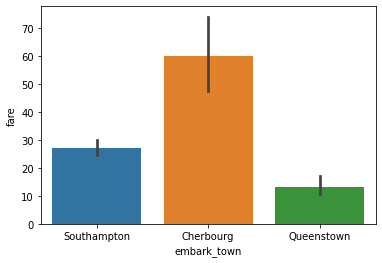

In [29]:
sns.barplot(data=ti,x='embark_town',y='fare')

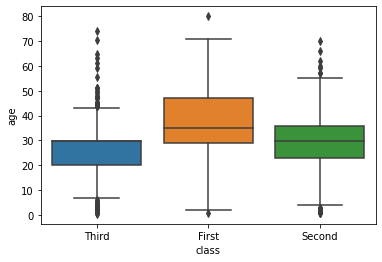

In [34]:
sns.boxplot(data=ti,x='class',y='age')

In [35]:
ti.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


Step 2 (25 min)

(*)What affected your chances of survival on the titanic?

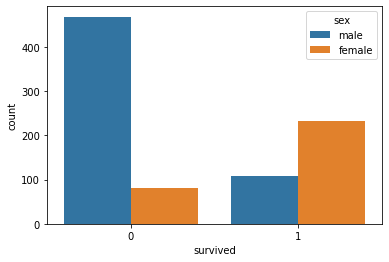

In [36]:
sns.countplot(data=ti,x='survived',hue='sex')

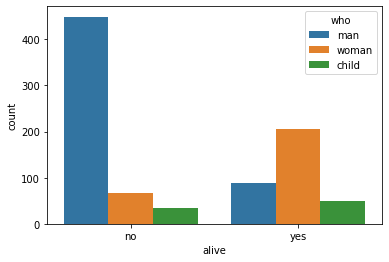

In [41]:
sns.countplot(data=ti,x='alive',hue='who')

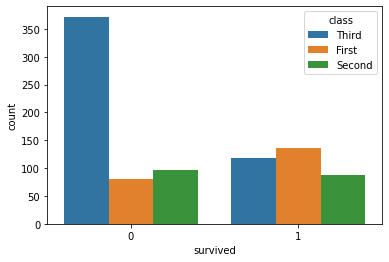

In [39]:
sns.countplot(data=ti,x='survived',hue='class')

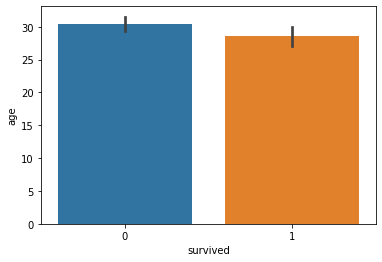

In [40]:
sns.barplot(data=ti,y='age',x='survived')

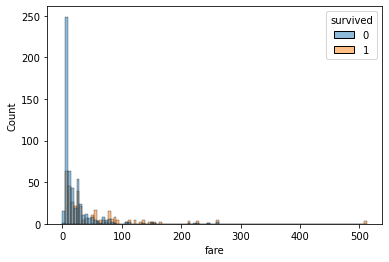

In [42]:
sns.histplot(data=ti,x='fare',hue='survived')

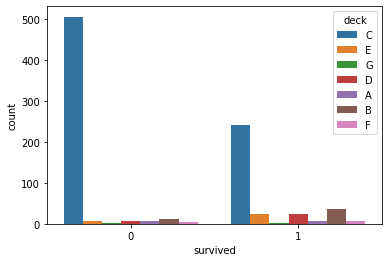

In [43]:
sns.countplot(data=ti,x='survived',hue='deck')

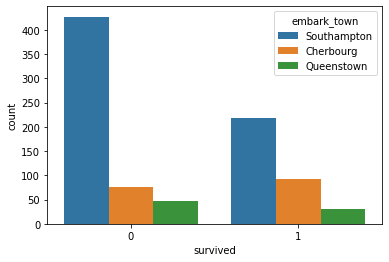

In [44]:
sns.countplot(data=ti,x='survived',hue='embark_town')

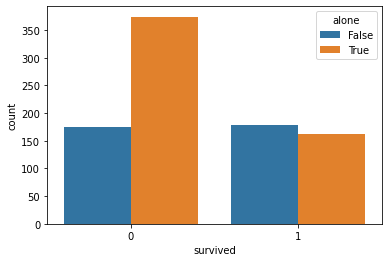

In [45]:
sns.countplot(data=ti,x='survived',hue='alone')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


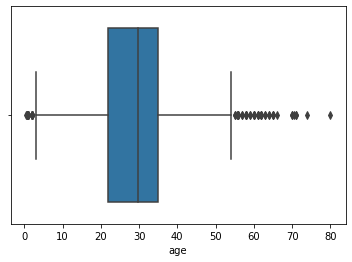

In [46]:
sns.boxplot(ti['age'])

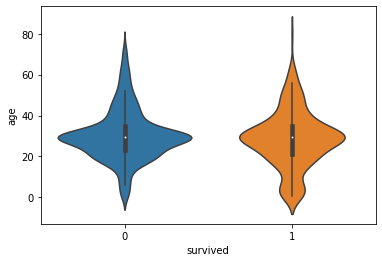

In [47]:
sns.violinplot(data=ti, x='survived', y='age')

In [48]:

ti[['age','sex']].groupby(ti.age>18).sum() #group by

,age
age,
False,1489.670000
True,24972.243824
